In [28]:
from makeData import *
import numpy as np
import matplotlib.pyplot as plt

def getlabels(y, seed_prop=0.1):
    """Given ground truth, select sample at random to be labelled."""
    seeds = -np.ones(y.shape)
    
    positives = np.where(y == 1)[0]
    np.random.shuffle(positives)
    seed_count = int(seed_prop/2 * len(positives))
    seeds[positives[:seed_count]] = 1
    
    negatives = np.where(y == 0)[0]
    np.random.shuffle(negatives)
    seed_count = int(seed_prop/2 * len(negatives))
    seeds[negatives[:seed_count]] = 0
    
    return seeds

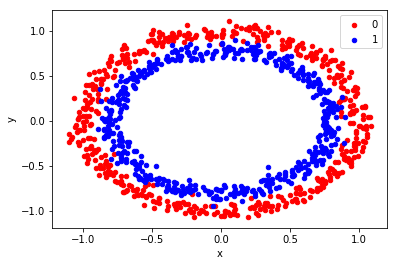

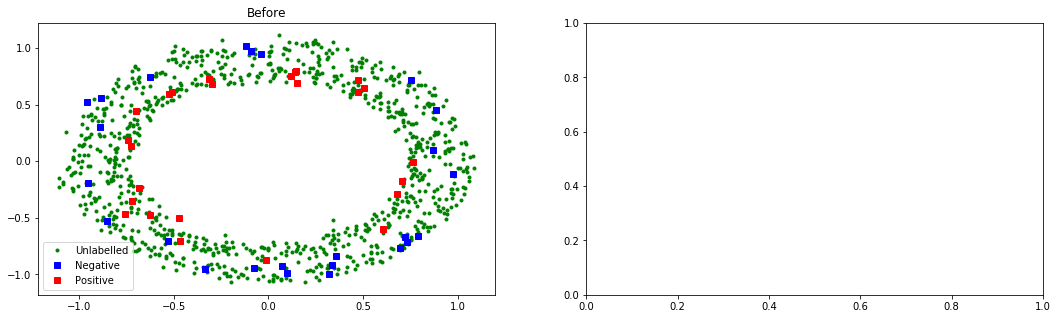

In [29]:
X, y = make_circles(n_samples=1000, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

labels = getlabels(y, 0.1)

fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax0, ax1 = ax[0], ax[1]

ax0.plot(X[labels==-1,0], X[labels==-1,1], 'g.', label='Unlabelled')
ax0.plot(X[labels==0,0], X[labels==0,1], 'bs', label='Negative')
ax0.plot(X[labels==1,0], X[labels==1,1], 'rs', label='Positive')
ax0.legend(loc='best', numpoints=1)
ax0.set_title('Before')

In [32]:
X

array([[ 0.60072192, -0.80634631],
       [ 0.34333977, -0.51775159],
       [-0.34711686, -0.77647492],
       ..., 
       [ 0.66149595, -0.37319016],
       [ 0.3398887 , -0.65617196],
       [-0.41735194, -0.66039653]])